In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


Text(0, 0.5, 'Count')

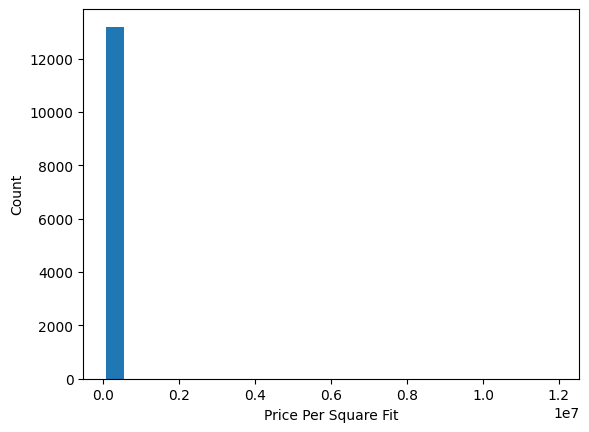

In [14]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square fit')
plt.ylabel('Count')

In [7]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [4]:
min_thresold, max_thresold = df['price_per_sqft'].quantile([0.001,0.999])
min_thresold ,max_thresold

(1366.184, 50959.36200000098)

In [5]:
df2 = df[(df['price_per_sqft']>min_thresold) & (df['price_per_sqft']<max_thresold)]
df.shape[0] - df2.shape[0]

28

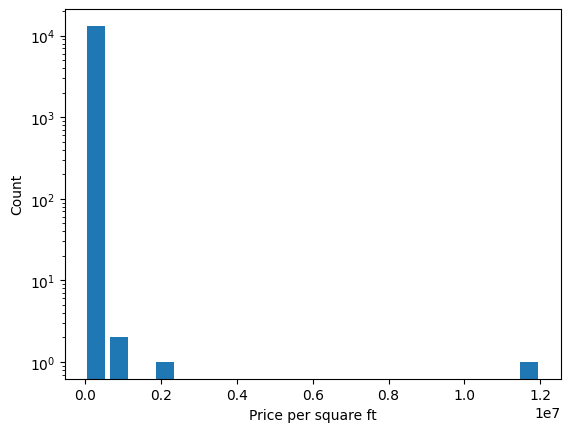

In [15]:
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price per square ft")
plt.ylabel("Count")
plt.yscale('log')

In [9]:
lower_limit = (df2['price_per_sqft'].mean()) - (4*(df2['price_per_sqft'].std()))
upper_limit = (df2['price_per_sqft'].mean()) + (4*(df2['price_per_sqft'].std()))

lower_limit, upper_limit

(-9900.429065502582, 23227.73653589432)

In [12]:
df2[ (df2['price_per_sqft']<lower_limit) | (df2['price_per_sqft']>upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [13]:
df3 = df2[(df2.price_per_sqft>lower_limit) & (df2.price_per_sqft<upper_limit)]
df3.shape

(13047, 7)

In [16]:
df2.shape[0] - df3.shape[0]

125

Text(0, 0.5, 'Count')

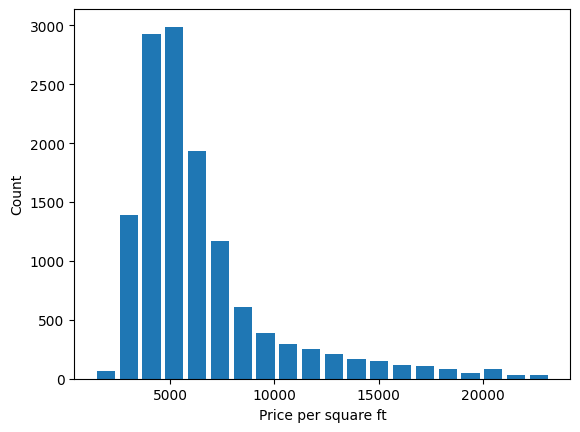

In [17]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')


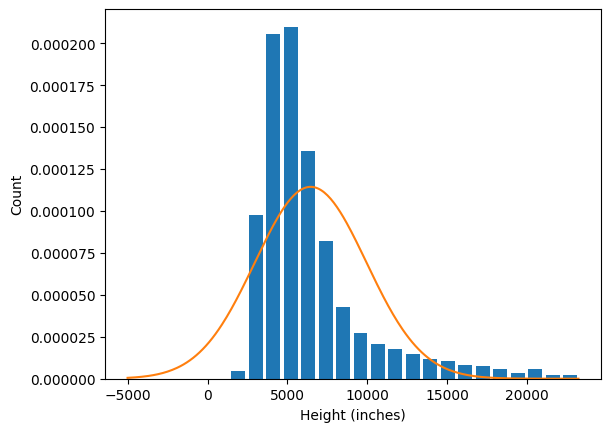

In [18]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [21]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Ujasl\AppData\Local\Temp\ipykernel_8624\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12985,other,4 BHK,2920.0,4.0,536.00,4,18356,2.823542
5277,Whitefield,2 BHK,1216.0,2.0,69.06,2,5679,-0.237780
3787,other,2 BHK,1150.0,2.0,75.00,2,6521,-0.034449
4824,Sultan Palaya,6 Bedroom,1800.0,8.0,175.00,6,9722,0.738549
5492,other,3 BHK,1500.0,2.0,90.00,3,6000,-0.160263
1797,Haralur Road,2 BHK,1194.0,2.0,46.00,2,3852,-0.678976
12897,Kammasandra,3 BHK,1616.0,3.0,40.00,3,2475,-1.011503
10762,Kundalahalli,2 BHK,1065.0,2.0,70.00,2,6572,-0.022133
11679,Chikka Tirupathi,4 Bedroom,3250.0,4.0,136.00,4,4184,-0.598803
10264,Raja Rajeshwari Nagar,8 Bedroom,3450.0,7.0,225.00,8,6521,-0.034449


In [22]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [23]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3873,other,5 Bedroom,1250.00,5.0,300.0,5,24000,4.186491
3401,Indira Nagar,6 Bedroom,2480.00,4.0,750.0,6,30241,5.693607
5974,other,4 Bedroom,2360.00,4.0,650.0,4,27542,5.041836
6134,Basavangudi,6 Bedroom,1754.00,6.0,650.0,6,37058,7.339820
5639,other,3 BHK,2777.29,5.0,650.0,3,23404,4.042565


In [24]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [25]:
df2.shape[0] - df4.shape[0]

125